In [438]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [439]:
df=pd.read_csv("C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\stroke prediction.csv")

In [440]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [442]:
df.drop('id',axis=1,inplace=True)


In [443]:
df.shape

(43400, 11)

In [444]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [445]:
continous= ['age','avg_glucose_level','bmi']
discrete_cat=['gender','ever_married','work_type','Residence_type','smoking_status']
discrete_num=['stroke','hypertension','heart_disease']

In [446]:
df[continous].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


In [447]:
unique_val=df[['gender','ever_married','work_type','Residence_type','smoking_status']].apply(lambda x: x.unique())
unique_val

gender                                        [Male, Female, Other]
ever_married                                              [No, Yes]
work_type         [children, Private, Never_worked, Self-employe...
Residence_type                                       [Rural, Urban]
smoking_status         [nan, never smoked, formerly smoked, smokes]
dtype: object

In [448]:
df['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [449]:
df.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
43395,False,False,False,False,False,False,False,False,False,False,False
43396,False,False,False,False,False,False,False,False,False,False,False
43397,False,False,False,False,False,False,False,False,False,False,False
43398,False,False,False,False,False,False,False,False,False,False,False


In [450]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [451]:
df.isnull().sum()/len(df)*100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [452]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0] , inplace=True)

In [453]:
df['smoking_status'].isnull().sum()

0

In [454]:
df['bmi'].skew()

0.8987282500249906

In [455]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [456]:
df['bmi'].isnull().sum()

0

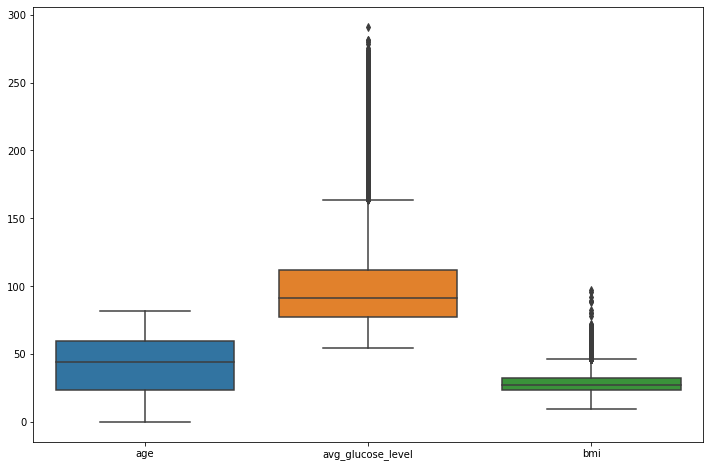

In [457]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['age','avg_glucose_level','bmi']])
plt.show()

In [458]:
df.skew()

C:\Users\usama\AppData\Local\Temp/ipykernel_2428/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                 -0.102497
hypertension         2.791199
heart_disease        4.254252
avg_glucose_level    1.675405
bmi                  0.925548
stroke               7.242226
dtype: float64

In [459]:
df.duplicated().sum()

0

In [460]:
#logarithmic transformation on right skewed data
#df['bmi']=np.log(df['bmi'])
#df['bmi'].skew()


In [461]:
#root transformation for left skewed data
#sqrt_transformed_data = np.sqrt(df['age'])
#df['age'].skew()

In [462]:
Q3=df['avg_glucose_level'].quantile(0.75)
Q1=df['avg_glucose_level'].quantile(0.25)
iqr=Q3-Q1
up=Q3+(iqr*1.5)
low=Q1-(iqr*1.5)
print(up,low)

163.86499999999998 25.745000000000026


In [463]:

#logarithmic transformation on right skewed data
#df['avg_glucose_level']=np.log(df['avg_glucose_level'])
#df['avg_glucose_level'].skew()



In [464]:
#!pip install feature_engine

In [465]:
from feature_engine.outliers import Winsorizer ## replace outlier with either maximum or minum using iqr

win= Winsorizer(capping_method='iqr', tail='both', fold=1.5)
df[['avg_glucose_level']]= win.fit_transform(df[['avg_glucose_level']])

<AxesSubplot:xlabel='avg_glucose_level'>

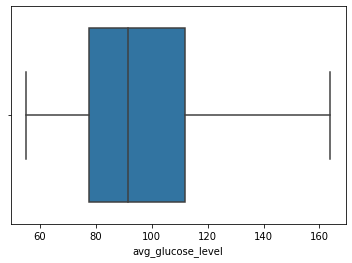

In [466]:
sns.boxplot(x=df['avg_glucose_level'])

In [467]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [468]:
input_data=df[['gender','ever_married','work_type','Residence_type','smoking_status']]
input_data

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,never smoked
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,never smoked
...,...,...,...,...,...
43395,Female,No,children,Urban,never smoked
43396,Female,Yes,Govt_job,Urban,formerly smoked
43397,Female,Yes,Private,Urban,formerly smoked
43398,Male,Yes,Private,Urban,never smoked


In [469]:
df.drop(columns=input_data, inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0


In [470]:
data=pd.get_dummies(input_data, drop_first=True)
data

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,1,0,0,0,0,0,1,0,1,0
1,1,0,1,0,1,0,0,1,1,0
2,0,0,0,0,1,0,0,1,1,0
3,0,0,1,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
43395,0,0,0,0,0,0,1,1,1,0
43396,0,0,1,0,0,0,0,1,0,0
43397,0,0,1,0,1,0,0,1,0,0
43398,1,0,1,0,1,0,0,1,1,0


In [471]:
df = pd.concat([df,data], axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.120,18.0,0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.960,39.2,0,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.890,17.6,0,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.040,35.9,0,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.280,19.1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.640,20.4,0,0,0,0,0,0,0,1,1,1,0
43396,56.0,0,0,163.865,55.4,0,0,0,1,0,0,0,0,1,0,0
43397,82.0,1,0,91.940,28.9,0,0,0,1,0,1,0,0,1,0,0
43398,40.0,0,0,99.160,33.2,0,1,0,1,0,1,0,0,1,1,0


In [472]:
X=df.drop('stroke', axis=1)
y=df['stroke']

In [474]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=6)

In [475]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)

#prediction
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
 #evaluation %model selection
from sklearn.metrics import accuracy_score
print('train accuracy', accuracy_score(y_train,y_pred_train))
print('test accuracy', accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
print ('cross validation score:', cross_val_score (model,X,y,cv=5,scoring='accuracy').mean())

train accuracy 0.9997407834101383
test accuracy 0.9808755760368664
cross validation score: 0.9812903225806453


In [476]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#model
estimator= RandomForestClassifier(random_state=0)

#parameter
param_grid={'n_estimators': list(range(1,101))}
 #identifying the best value of the parameter within given values for the given data

grid=GridSearchCV( estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 58}

In [477]:
grid.best_estimator_.feature_importances_

array([2.37225287e-01, 1.79325667e-02, 1.84947103e-02, 2.64767952e-01,
       3.19152151e-01, 2.82934096e-02, 3.02628798e-05, 1.35359216e-02,
       1.69462004e-05, 1.63606081e-02, 1.55171921e-02, 6.31220932e-04,
       3.06788599e-02, 2.26625481e-02, 1.47003635e-02])

In [478]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                  index=X.columns,
                  columns=['feature importance'])
important_features=feats[feats['feature importance']>0]
important_features_list=important_features.index.to_list()
important_features_list


['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [479]:
#input with impottant features
X_new=X[important_features_list]

X_train, X_test, y_train,y_test=train_test_split(X_new,y,test_size=0.2, random_state=6)
dt_bhb=grid.best_estimator_
dt_bhb.fit(X_train,y_train)

y_pred_train=dt_bhb.predict(X_train)
y_pred_test=dt_bhb.predict(X_test)
 #evaluation %model selection
from sklearn.metrics import accuracy_score
print('train accuracy', accuracy_score(y_train,y_pred_train))
print('test accuracy', accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
print ('cross validation score:', cross_val_score (dt_bhb,X,y,cv=5,scoring='accuracy').mean())

train accuracy 0.9995391705069124
test accuracy 0.9807603686635945
cross validation score: 0.9812211981566821
